In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('iris.csv').drop('Id', axis=1)
#drop SepalLengthCm, SepalWidthCm
df = df.drop(['SepalLengthCm', 'SepalWidthCm'], axis=1)
print(df)

     PetalLengthCm  PetalWidthCm         Species
0              1.4           0.2     Iris-setosa
1              1.4           0.2     Iris-setosa
2              1.3           0.2     Iris-setosa
3              1.5           0.2     Iris-setosa
4              1.4           0.2     Iris-setosa
..             ...           ...             ...
145            5.2           2.3  Iris-virginica
146            5.0           1.9  Iris-virginica
147            5.2           2.0  Iris-virginica
148            5.4           2.3  Iris-virginica
149            5.1           1.8  Iris-virginica

[150 rows x 3 columns]


In [47]:
setosa = np.array(df[df['Species'] == 'Iris-setosa'].drop('Species', axis=1))
versicolor = np.array(df[df['Species'] == 'Iris-versicolor'].drop('Species', axis=1))
virginica = np.array(df[df['Species'] == 'Iris-virginica'].drop('Species', axis=1))

train_setosa = setosa[:40,:]
train_versicolor = versicolor[:40,:]
train_virginica = virginica[:40,:]

In [48]:
def covariance(X):
    mean = np.mean(X,axis=0)
    X = X - mean
    return np.dot(X.T, X)/(X.shape[0]-1)

In [49]:
def g_of_x(X, apriori):
    cov = covariance(X)
    inv_cov = np.linalg.inv(cov)
    mean = np.mean(X,axis=0)
    cov_det = np.linalg.det(cov)

    A = -0.5*inv_cov
    B = np.dot(inv_cov,mean)
    C = -0.5*np.dot(mean.T,np.dot(inv_cov, mean)) - 0.5*np.log(cov_det) + np.log(apriori)
    return lambda x: x.T @ A @ x + B.T @ x + C  

In [50]:
def discriminant_plot(g1, g2):
    x = np.linspace(-10,10,100)
    y = np.linspace(-10,10,100)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = g1(np.array([X[i,j],Y[i,j]])) - g2(np.array([X[i,j],Y[i,j]]))
    plt.contour(X, Y, Z, levels=[0])
    plt.axis([0, 8, -1, 4])

In [51]:
g1 = g_of_x(train_setosa,1/3)
g2 = g_of_x(train_versicolor,1/3)
g3 = g_of_x(train_virginica,1/3)

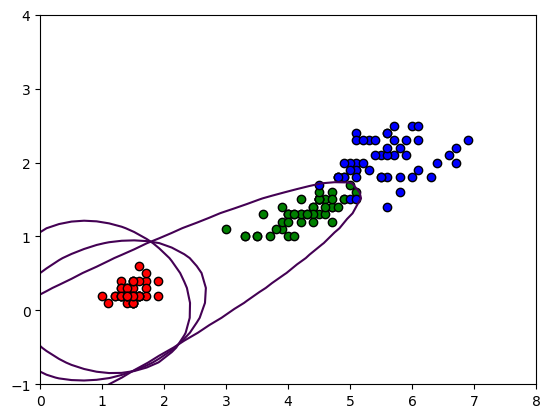

In [52]:
discriminant_plot(g1,g2)
discriminant_plot(g1,g3)
discriminant_plot(g2,g3)
plt.scatter(setosa[:,0],setosa[:,1],color = "r", edgecolors="k")
plt.scatter(versicolor[:,0],versicolor[:,1],color = "g", edgecolors="k")
plt.scatter(virginica[:,0],virginica[:,1],color = "b",edgecolors="k")
plt.show()